In [15]:
!pip install tensorflow

In [16]:
import tensorflow as tf
from tensorflow import keras

In [17]:
tf.__version__

'2.13.0'

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
from tensorflow.keras.preprocessing.image import load_img

In [20]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.xception import decode_predictions

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

In [24]:
# Подготовка данных

train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    '/content/drive/MyDrive/dino-dragon',
    target_size=(150, 150),
    batch_size=32
)

Found 1988 images belonging to 2 classes.


In [25]:
# Модель

input_layer = Input(shape=(150, 150, 3))

model = Sequential()

model.add(input_layer)

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))

model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)

# 1 question
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 2 question
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 175232)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                11214912  
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11215873 (42.79 MB)
Trainable params: 11215873 (42.79 MB)
Non-trainable params: 0 (0.00 Byte)
____________

In [26]:
# Генераторы и обучение

train_data_dir = '/content/drive/MyDrive/dino-dragon/train'
test_data_dir = '/content/drive/MyDrive/dino-dragon/test'

train_datagen = ImageDataGenerator(
    rescale=(1.0 / 255),
    validation_split=0.2 # Тут я решила добавить валидацию, данные для которой взяла из трейна
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

batch_size = 20

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Found 1276 images belonging to 2 classes.
Found 318 images belonging to 2 classes.
Found 394 images belonging to 2 classes.
Epoch 1/10
64/64 [==============================] - 10s 136ms/step - loss: 0.6502 - accuracy: 0.5917 - val_loss: 0.5382 - val_accuracy: 0.7799
Epoch 2/10
64/64 [==============================] - 9s 144ms/step - loss: 0.4754 - accuracy: 0.8002 - val_loss: 0.5302 - val_accuracy: 0.7013
Epoch 3/10
64/64 [==============================] - 8s 127ms/step - loss: 0.3947 - accuracy: 0.8362 - val_loss: 0.4051 - val_accuracy: 0.8270
Epoch 4/10
64/64 [==============================] - 6s 98ms/step - loss: 0.3440 - accuracy: 0.8636 - val_loss: 0.3948 - val_accuracy: 0.8176
Epoch 5/10
64/64 [==============================] - 7s 109ms/step - loss: 0.2936 - accuracy: 0.8950 - val_loss: 0.3584 - val_accuracy: 0.8396
Epoch 6/10
64/64 [==============================] - 6s 98ms/step - loss: 0.2716 - accuracy: 0.8958 - val_loss: 0.3588 - val_accuracy: 0.8208
Epoch 7/10
64/64 [=======

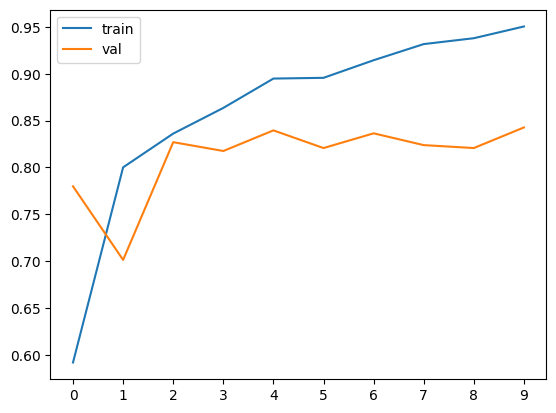

In [27]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

In [28]:
# 3 question
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

median_accuracy = np.median(train_accuracy)
median_val_accuracy = np.median(validation_accuracy)

print(f'Медиана точности обучения по всем эпохам train: {median_accuracy:.4f}')
print(f'Медиана точности обучения по всем эпохам validation: {median_val_accuracy:.4f}')

Медиана точности обучения по всем эпохам train: 0.8954
Медиана точности обучения по всем эпохам validation: 0.8223


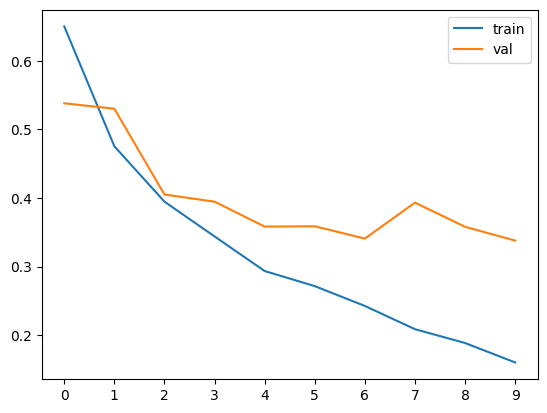

In [29]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xticks(np.arange(10))
plt.legend()

In [30]:
# 4 question
train_loss = history.history['loss']
validation_loss = history.history['val_loss']

median_loss = np.median(train_loss)
median_val_loss = np.median(validation_loss)

print(f'Медиана стандартного отклонения потерь по всем эпохам train: {median_loss:.4f}')
print(f'Медиана стандартного отклонения потерь по всем эпохам validation: {median_val_loss:.4f}')

Медиана точности обучения по всем эпохам train: 0.2826
Медиана точности обучения по всем эпохам validation: 0.3761


In [31]:
# Аугментация данных

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Found 1276 images belonging to 2 classes.
Found 318 images belonging to 2 classes.
Found 394 images belonging to 2 classes.
Epoch 1/10
64/64 [==============================] - 16s 258ms/step - loss: 0.4439 - accuracy: 0.8049 - val_loss: 0.4088 - val_accuracy: 0.8082
Epoch 2/10
64/64 [==============================] - 15s 231ms/step - loss: 0.4189 - accuracy: 0.8002 - val_loss: 0.4849 - val_accuracy: 0.7767
Epoch 3/10
64/64 [==============================] - 15s 230ms/step - loss: 0.3833 - accuracy: 0.8354 - val_loss: 0.4074 - val_accuracy: 0.8113
Epoch 4/10
64/64 [==============================] - 16s 243ms/step - loss: 0.4163 - accuracy: 0.8080 - val_loss: 0.4287 - val_accuracy: 0.8113
Epoch 5/10
64/64 [==============================] - 15s 234ms/step - loss: 0.3794 - accuracy: 0.8197 - val_loss: 0.3730 - val_accuracy: 0.8491
Epoch 6/10
64/64 [==============================] - 15s 231ms/step - loss: 0.3759 - accuracy: 0.8354 - val_loss: 0.4060 - val_accuracy: 0.8145
Epoch 7/10
64/64 [

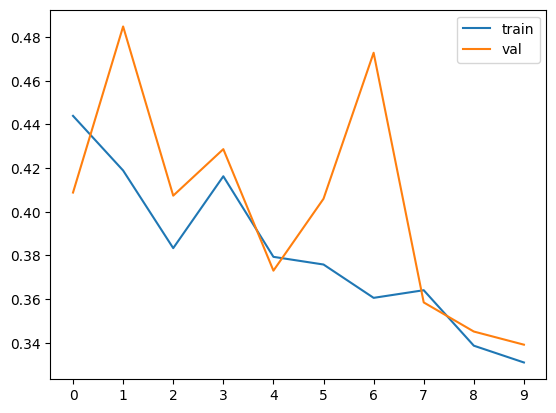

In [32]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xticks(np.arange(10))
plt.legend()

In [33]:
# 5 question
train_loss = history.history['loss']
validation_loss = history.history['val_loss']

median_loss = np.median(train_loss)
median_val_loss = np.median(validation_loss)

print(f'Медиана стандартного отклонения потерь по всем эпохам train: {median_loss:.4f}')
print(f'Медиана стандартного отклонения потерь по всем эпохам validation: {median_val_loss:.4f}')

Медиана стандартного отклонения потерь по всем эпохам train: 0.3776
Медиана стандартного отклонения потерь по всем эпохам validation: 0.4067


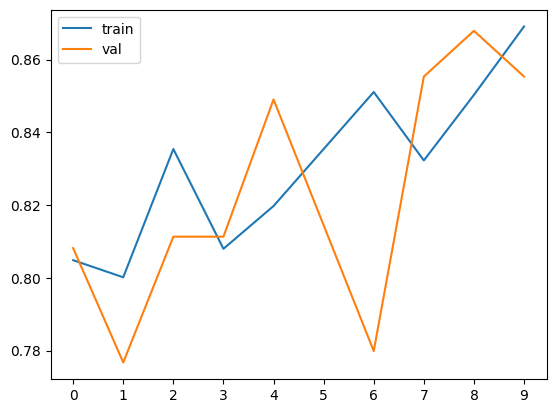

In [34]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

In [37]:
# 6 question
train_accuracy = history.history['accuracy'][5:10]
validation_accuracy = history.history['val_accuracy'][5:10]

median_accuracy = np.median(train_accuracy)
median_val_accuracy = np.median(validation_accuracy)

print(f'Медиана точности обучения по всем эпохам train: {median_accuracy:.4f}')
print(f'Медиана точности обучения по всем эпохам validation: {median_val_accuracy:.4f}')

Медиана точности обучения по всем эпохам train: 0.8503
Медиана точности обучения по всем эпохам validation: 0.8553
